### Import Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

### Import Dataset

In [20]:
df = pd.read_csv("walmart.csv")
df.head()

,Unnamed: 0,date,store,item,sales
0,1,1/1/13,1,1,13
1,2,1/2/13,1,1,11
2,3,1/3/13,1,1,14
3,4,1/4/13,1,1,13
4,5,1/5/13,1,1,10


In [21]:
del df["Unnamed: 0"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [22]:
df["date"] = pd.to_datetime(df["date"])
df[:5]

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [25]:
df.set_index("date", inplace = True)

# Store 8 and Item 50 Sales

In [26]:
store_8_50 = df[(df["store"] == 8) & (df["item"] == 50)]
store_8_50 = store_8_50[["sales"]]
store_8_50[:5]

,sales
date,
2013-01-01,45
2013-01-02,54
2013-01-03,54
2013-01-04,52
2013-01-05,48


### Item 50 of Wallmart Store 8 Sales by Date

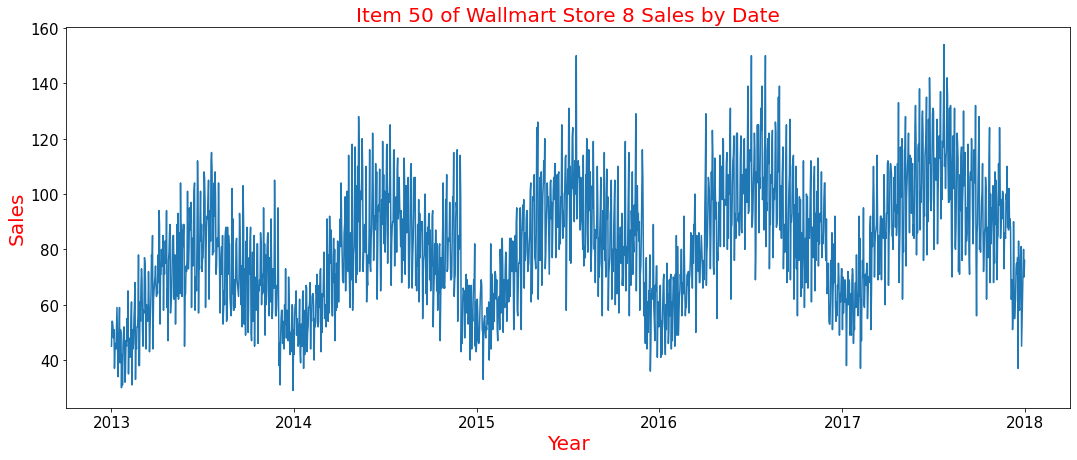

In [27]:
# Sales Graph
plt.figure(figsize = (18, 7))
sns.lineplot(x = store_8_50.index, y = "sales", data = store_8_50)
plt.title("Item 50 of Wallmart Store 8 Sales by Date", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Year", size = 20, color = "red")
plt.ylabel("Sales", size = 20, color = "red")
plt.show()

### Stationary Checking of Item 50 of Wallmart Store 8 Sales

In [72]:
state = adfuller(store_8_50)
print('p-value: %f' % state[1])

p-value: 0.024424


### Autocorrelation of Item 50 of Wallmart Store 8 Sales

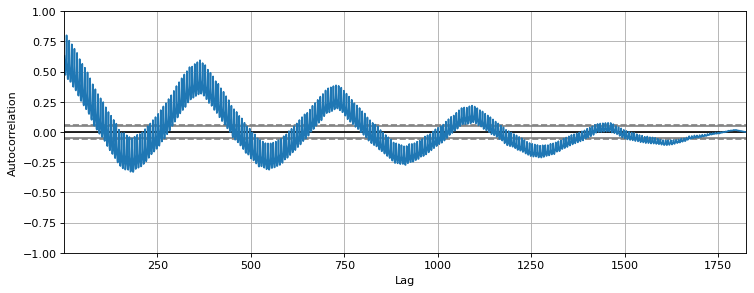

In [79]:
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(store_8_50['sales']);

### Realization Item 50 of Wallmart Store 8 Sales

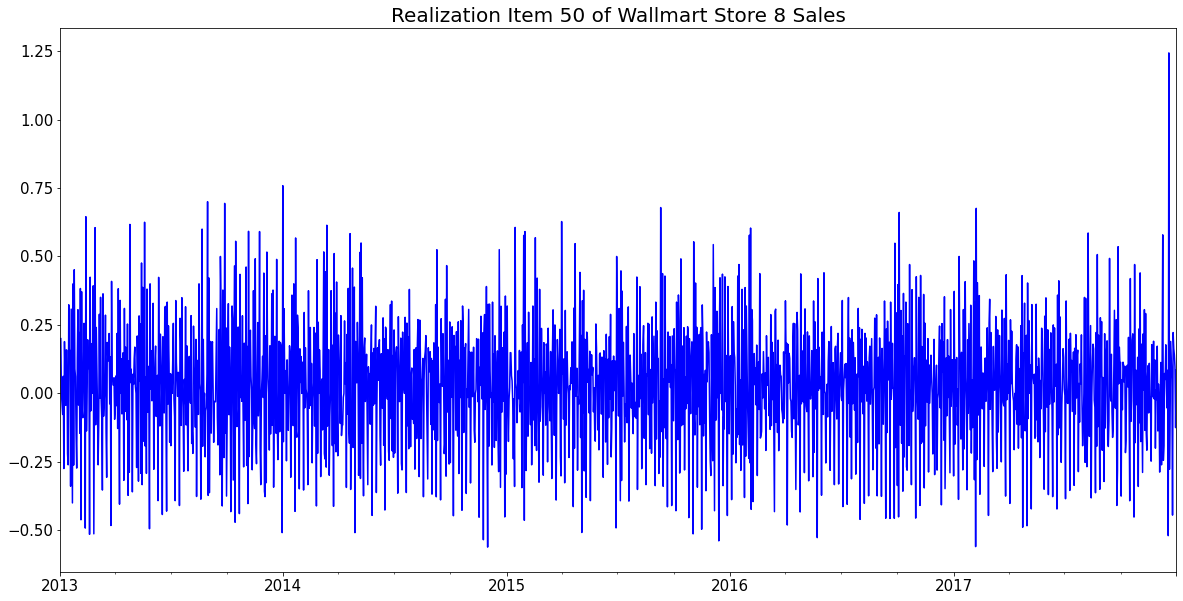

In [122]:
r = store_8_50['sales'] / store_8_50['sales'].shift(1) - 1

plt.figure(figsize = (20,10))
r.plot(label='Sales', color = 'blue')
plt.title("Realization Item 50 of Wallmart Store 8 Sales", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.show()

### Magnitude Spectrum of Item 50 of Wallmart Store 8 Sales

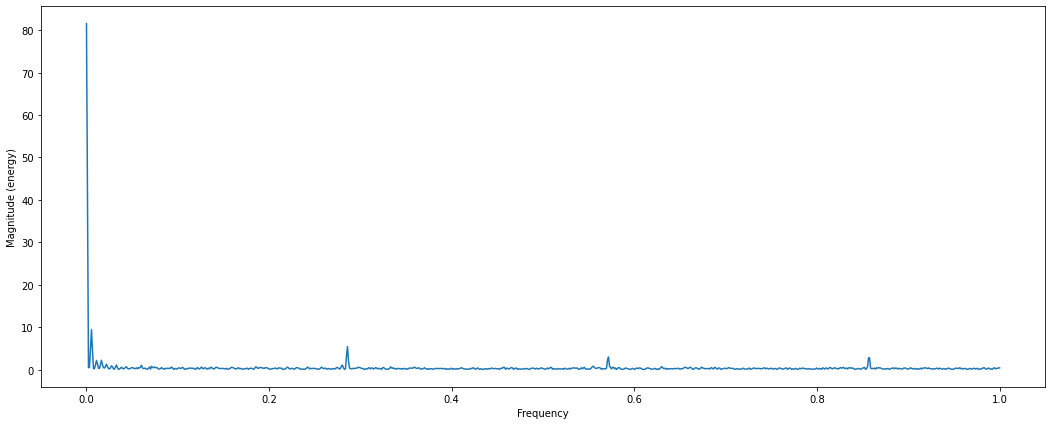

In [99]:
plt.figure(figsize = (18, 7))
plt.magnitude_spectrum(store_8_50['sales'])
plt.show()

# 5 point moving average of Item 50 of Wallmart Store 8 Sales by Date

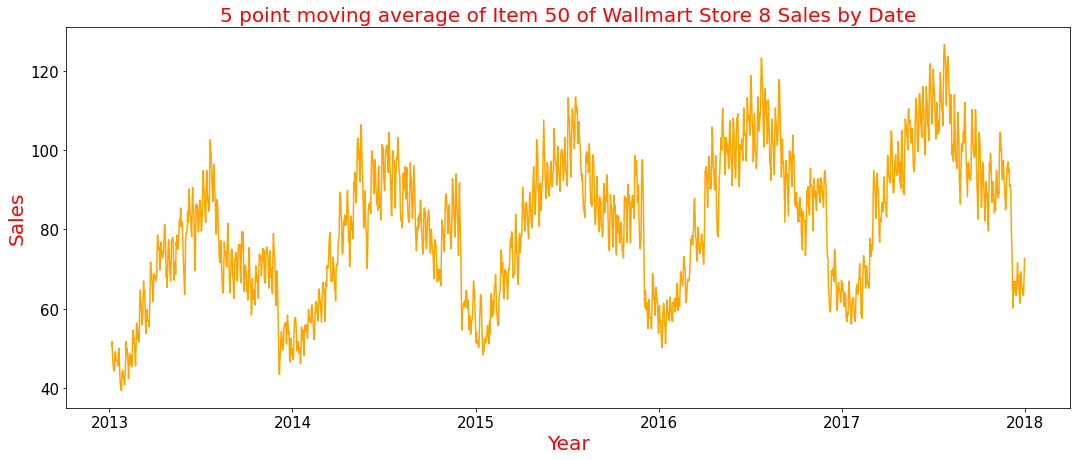

In [32]:
rolling_5 = store_8_50.rolling(5).mean()

plt.figure(figsize = (18, 7))
sns.lineplot(x = rolling_5.index, y = "sales", data = rolling_5, color = "orange")
plt.title("5 point moving average of Item 50 of Wallmart Store 8 Sales by Date", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Year", size = 20, color = "red")
plt.ylabel("Sales", size = 20, color = "red")
plt.show()

### Spectral Density of 5 point moving average of Item 50 of Wallmart Store 8 Sales

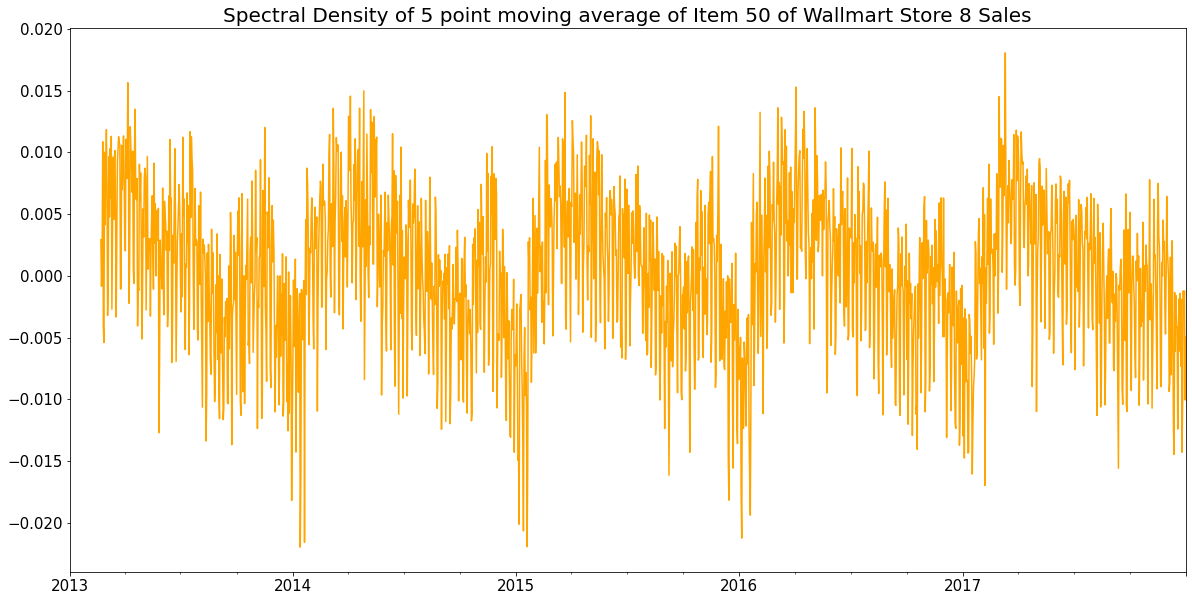

In [121]:
r = rolling_5['sales'] / rolling_5['sales'].shift(1) - 1

plt.figure(figsize = (20,10))
r.plot(label='Sales', color = 'orange')
plt.title("Spectral Density of 5 point moving average of Item 50 of Wallmart Store 8 Sales", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.show()

# 51 point moving average of Item 50 of Wallmart Store 8 Sales by Date

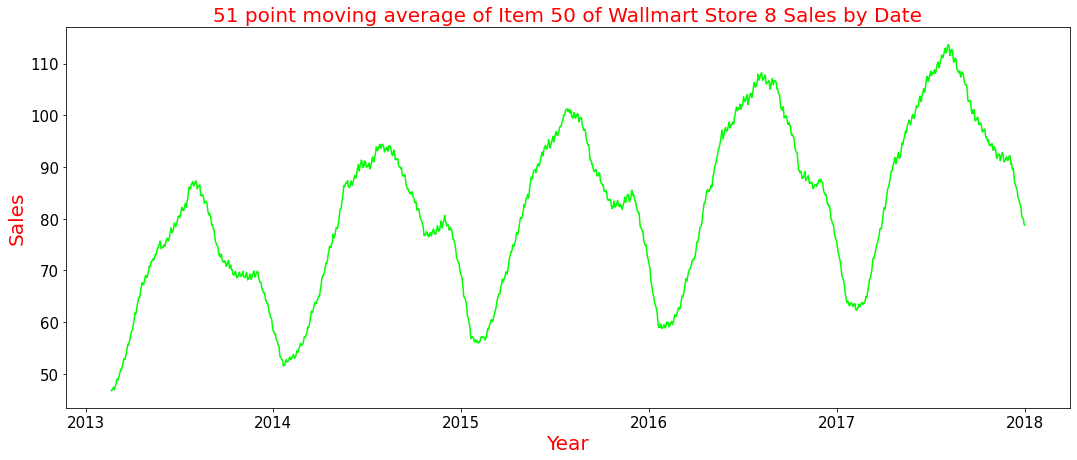

In [116]:
rolling_51 = store_8_50.rolling(51).mean()

plt.figure(figsize = (18, 7))
sns.lineplot(x = rolling_51.index, y = "sales", data = rolling_51, color = "lime")
plt.title("51 point moving average of Item 50 of Wallmart Store 8 Sales by Date", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Year", size = 20, color = "red")
plt.ylabel("Sales", size = 20, color = "red")
plt.show()

### Spectral Density of 51 point moving average of Item 50 of Wallmart Store 8 Sales by Date

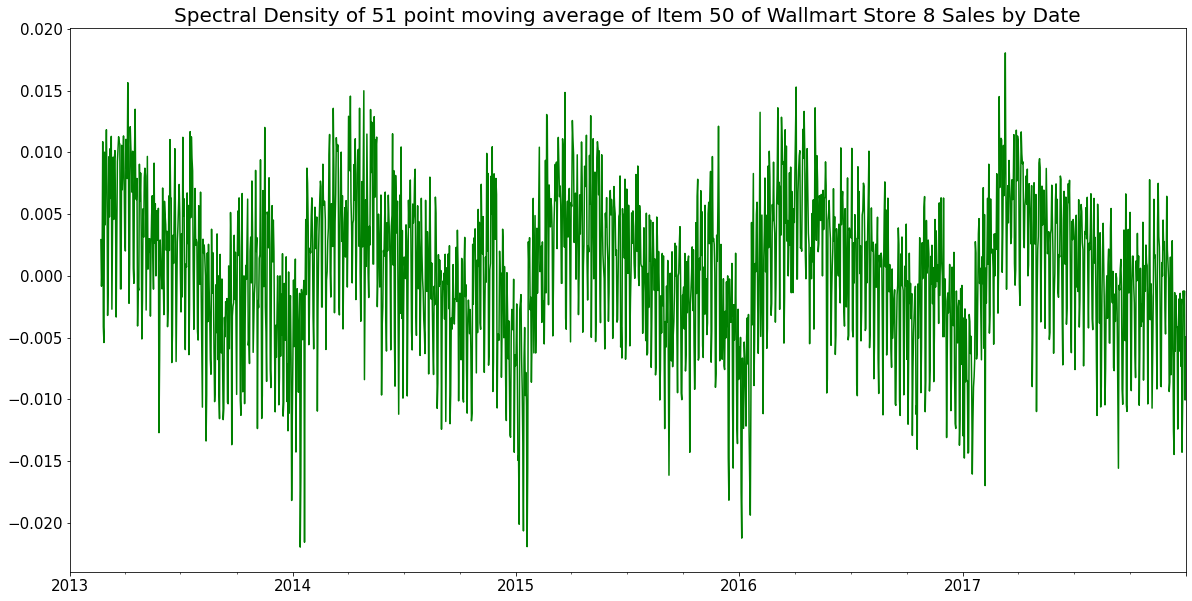

In [120]:
r51 = rolling_51['sales'] / rolling_51['sales'].shift(1) - 1

plt.figure(figsize = (20,10))
r51.plot(label='Sales', color = 'g')
plt.title("Spectral Density of 51 point moving average of Item 50 of Wallmart Store 8 Sales by Date", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.show()

# Item 6 of Store 4 Sales

In [40]:
store_4_6 = df[(df["store"] == 4) & (df["item"] == 6)]
store_4_6 = store_4_6[["sales"]]
store_4_6[:5]

,sales
date,
2013-01-01,24
2013-01-02,35
2013-01-03,34
2013-01-04,42
2013-01-05,41


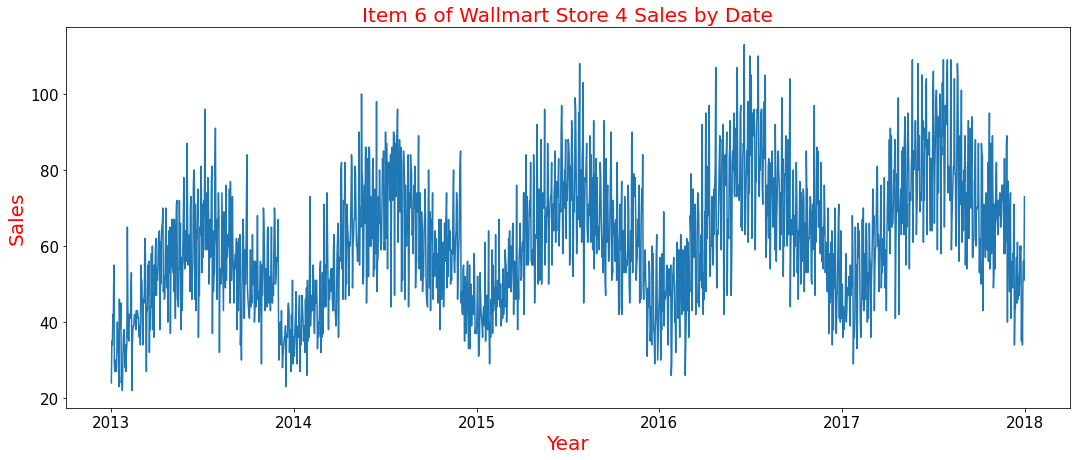

In [41]:
# Sales Graph
plt.figure(figsize = (18, 7))
sns.lineplot(x = store_4_6.index, y = "sales", data = store_4_6)
plt.title("Item 6 of Wallmart Store 4 Sales by Date", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Year", size = 20, color = "red")
plt.ylabel("Sales", size = 20, color = "red")
plt.show()

### Stationary Check of Item 6 of Wallmart Store 4 Sales

In [100]:
state = adfuller(store_4_6)
print('p-value: %f' % state[1])

p-value: 0.051147


### Autocorrelation of Item 6 of Wallmart Store 4 Sales

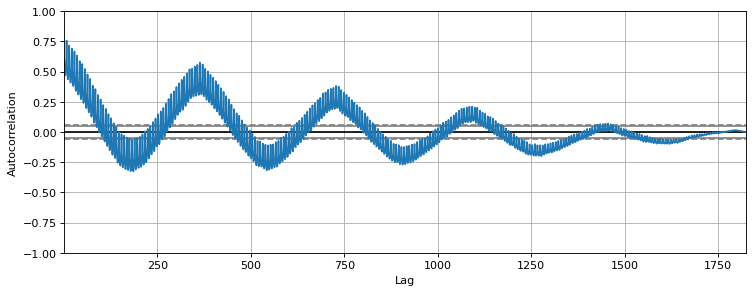

In [101]:
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(store_4_6['sales']);

### Realization of Item 6 of Wallmart Store 4 Sales

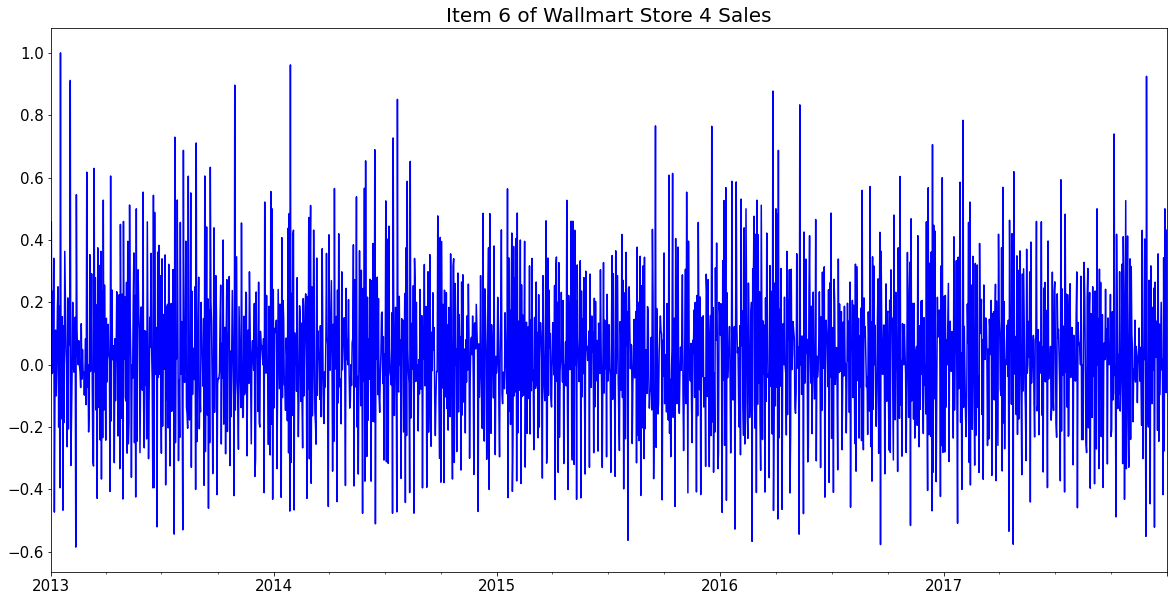

In [119]:
r = store_4_6['sales'] / store_4_6['sales'].shift(1) - 1

plt.figure(figsize = (20,10))
r.plot(label='Sales', color = 'blue')
plt.title("Item 6 of Wallmart Store 4 Sales", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.show()

### Magnitude Spectrum of Item 6 of Wallmart Store 4 Sales

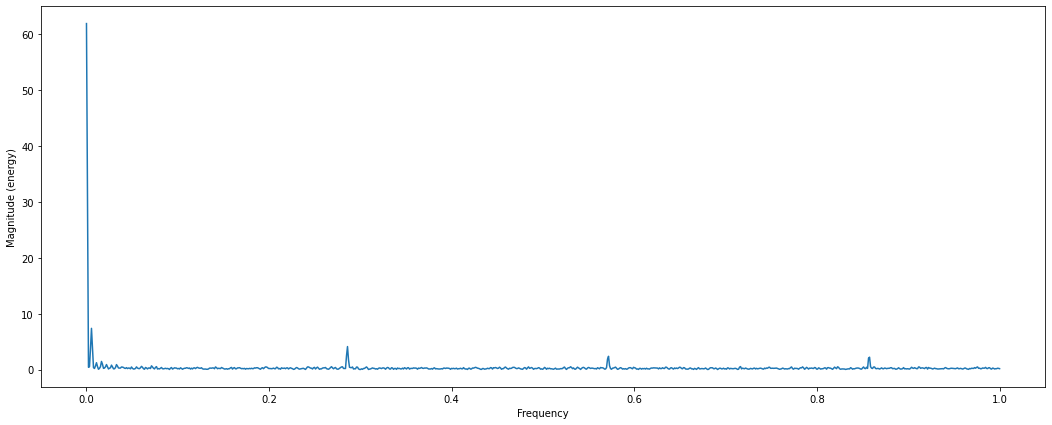

In [103]:
plt.figure(figsize = (18, 7))
plt.magnitude_spectrum(store_4_6['sales'])
plt.show()

### 5 point moving average of Item 6 of Wallmart Store 4 Sales by Date

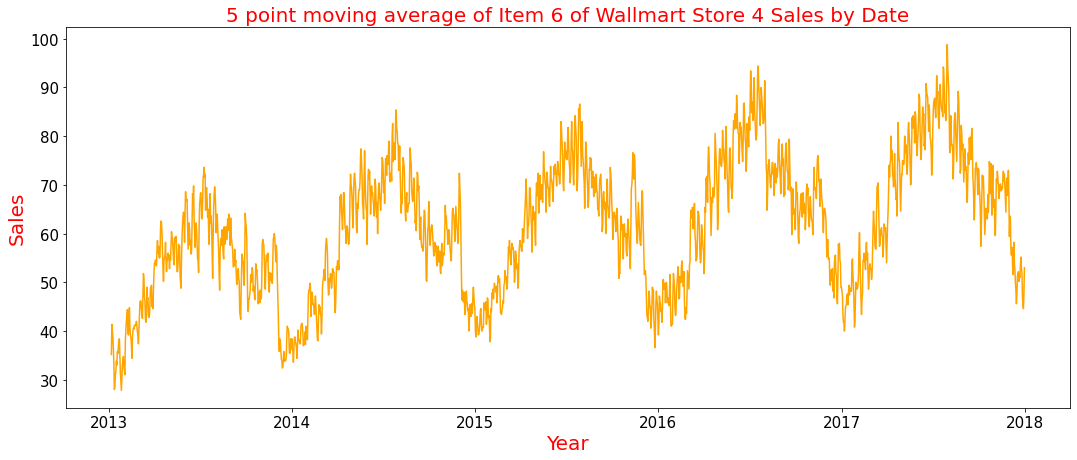

In [43]:
rolling_46_5 = store_4_6.rolling(5).mean()


plt.figure(figsize = (18, 7))
sns.lineplot(x = rolling_46_5.index, y = "sales", data = rolling_46_5, color = "orange")
plt.title("5 point moving average of Item 6 of Wallmart Store 4 Sales by Date", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Year", size = 20, color = "red")
plt.ylabel("Sales", size = 20, color = "red")
plt.show()

### Spectral Density of 5 point moving average of Item 6 of Wallmart Store 4 Sales

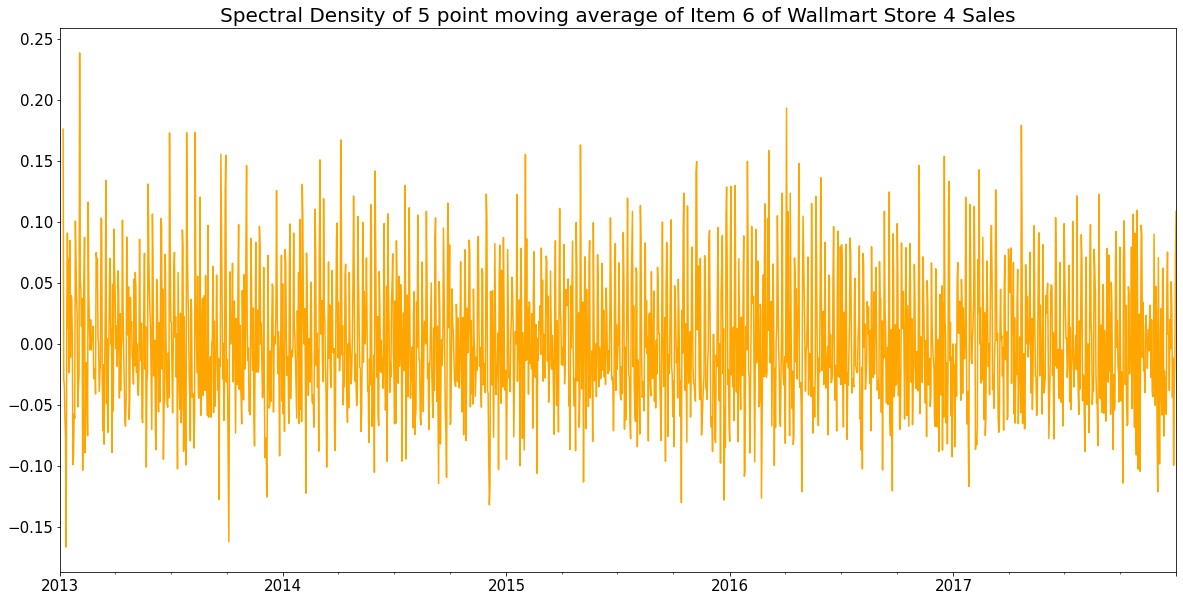

In [125]:
r465 = rolling_46_5['sales'] / rolling_46_5['sales'].shift(1) - 1

plt.figure(figsize = (20,10))
r465.plot(label='Sales', color = 'orange')
plt.title("Spectral Density of 5 point moving average of Item 6 of Wallmart Store 4 Sales", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.show()

### 51 point moving average of Item 6 of Wallmart Store 4 Sales by Date

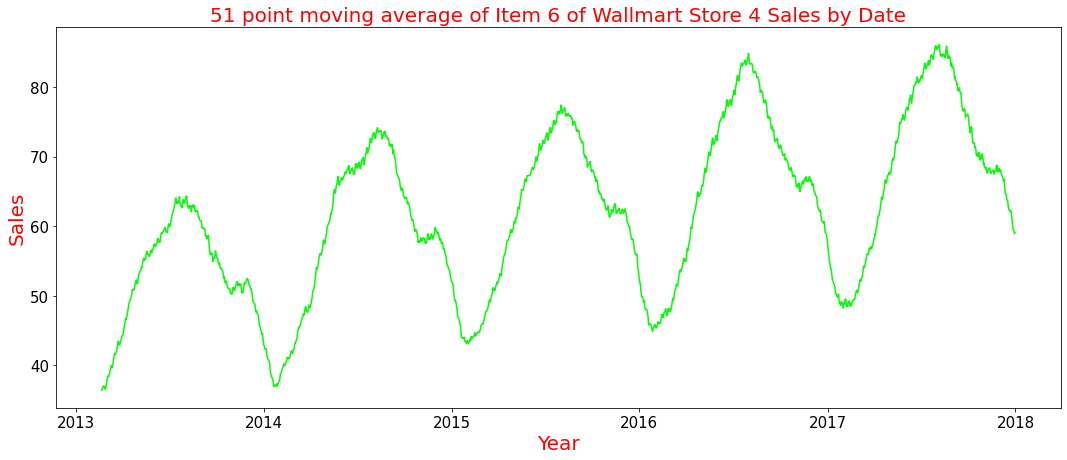

In [124]:
rolling_46_51 = store_4_6.rolling(51).mean()


plt.figure(figsize = (18, 7))
sns.lineplot(x = rolling_46_51.index, y = "sales", data = rolling_46_51, color = "lime")
plt.title("51 point moving average of Item 6 of Wallmart Store 4 Sales by Date", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Year", size = 20, color = "red")
plt.ylabel("Sales", size = 20, color = "red")
plt.show()

### Spectral Density of 51 point moving average of Item 6 of Wallmart Store 4 Sales

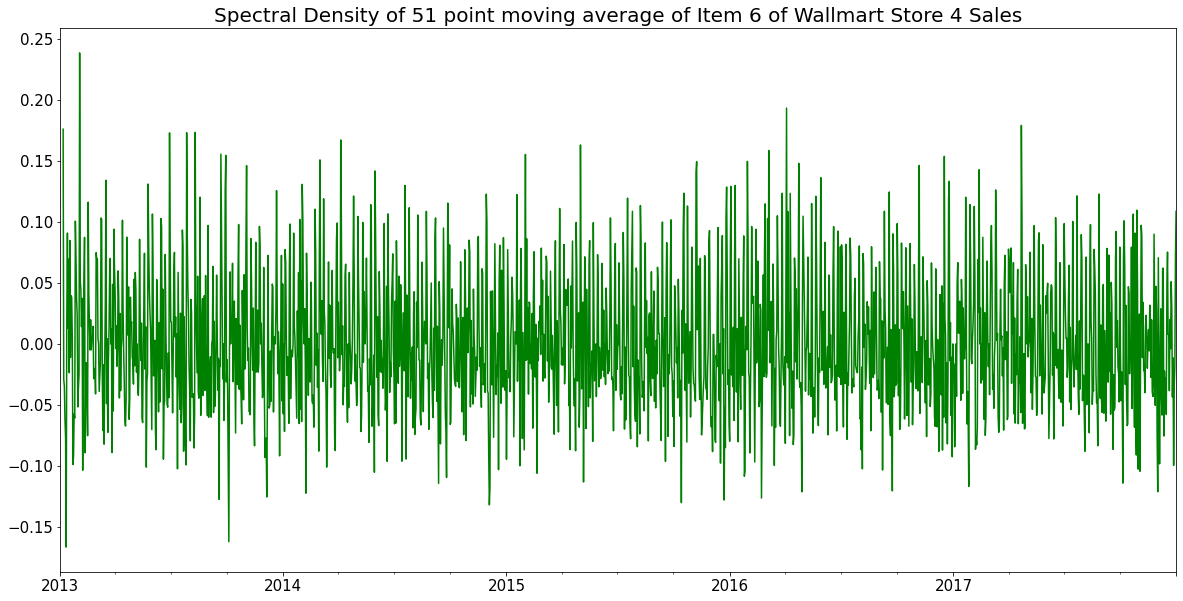

In [126]:
r4651 = rolling_46_51['sales'] / rolling_46_51['sales'].shift(1) - 1

plt.figure(figsize = (20,10))
r465.plot(label='Sales', color = 'green')
plt.title("Spectral Density of 51 point moving average of Item 6 of Wallmart Store 4 Sales", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.show()